In [1]:
#imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

#keras
import keras
from keras import layers 
from keras.models import Sequential 

In [2]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image

import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, scale, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D, UpSampling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import optimizers
from keras.regularizers import l1
from keras.utils.vis_utils import plot_model
from datetime import datetime
from sklearn import metrics
import librosa, librosa.display, os, csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
plt.switch_backend('agg')
import itertools
import scipy as sp
from scipy import signal

import joblib
from glob import glob
import urllib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

In [3]:
train_csv = pd.read_csv('D:\Corona folder\srikanth corona project\cough_trial_extended.csv')
train_csv['file_properties']='D:/Corona folder/srikanth corona project/trial_covid/'+train_csv['file_properties']
train_csv


,file_properties,class
0,D:/Corona folder/srikanth corona project/trial...,not_covid
1,D:/Corona folder/srikanth corona project/trial...,not_covid
2,D:/Corona folder/srikanth corona project/trial...,not_covid
3,D:/Corona folder/srikanth corona project/trial...,not_covid
4,D:/Corona folder/srikanth corona project/trial...,covid
...,...,...
165,D:/Corona folder/srikanth corona project/trial...,not_covid
166,D:/Corona folder/srikanth corona project/trial...,not_covid
167,D:/Corona folder/srikanth corona project/trial...,not_covid
168,D:/Corona folder/srikanth corona project/trial...,not_covid


In [18]:
import pandas as pd
tf=pd.read_csv(r'D:\Corona folder\srikanth corona project\covid_dataset.csv')
tf['filename']=r'D:/Corona folder/srikanth corona project/trial_covid/'+tf['filename']
tf1=tf.iloc[:,0:1]
tf2=tf.iloc[:,28:29]
tf2
TF=tf1.join(tf2)
TF
TF.rename(columns={'filename':'file_properties','label':'class'},inplace=True)
TF
data=pd.concat((train_csv,TF),axis=0,join='outer',ignore_index=True)
data['class'].replace({'positive':'covid','negative':'not_covid'},inplace=True)


In [20]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [21]:
import csv
file = open('obtained_values.csv', 'w')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i ,j in data.iterrows():
    file_name=j['file_properties']
    lab=j['class']
    y,sr = librosa.load(file_name, mono=True, duration=5)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=40)
    to_append = f'{file_name[56:66]} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append +=f' {lab}'
    
    
    file = open('obtained_values.csv', 'a')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())
        

In [22]:
df = pd.read_csv('obtained_values.csv')
df

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,label
0,MGxNetjg_,0.519951,0.045853,1612.895795,1411.838677,2907.580566,0.107019,-376.876007,111.017372,-31.904013,...,-2.276272,-0.625641,-1.608061,-1.412680,-0.594154,-2.270374,-1.230999,-1.667140,-0.667805,not_covid
1,duoxdxBg_,0.535472,0.001771,2892.087076,2467.408141,5072.664388,0.148584,-519.158447,60.781284,-13.722886,...,1.927568,-2.116628,1.253289,-2.312178,1.540753,-3.853856,1.536122,-3.761888,0.968226,not_covid
2,YO4wgiag_,0.496666,0.033657,3429.061935,2788.634413,6886.288452,0.225315,-282.297913,48.581680,-15.522366,...,2.145280,-2.767728,0.227271,-2.796792,-0.805099,-2.301651,0.147189,-1.996069,2.062976,not_covid
3,jbAKd8Kg_,0.407549,0.013452,2710.811637,2664.287550,5778.474935,0.142076,-346.857300,75.765617,-7.648193,...,1.614948,-1.242405,-1.523256,-4.805856,-1.141960,-2.236271,-2.583130,-5.340420,-2.442520,not_covid
4,1.wav,0.412697,0.059004,1555.648634,1418.599932,2870.737092,0.133998,-340.588013,104.156700,-32.228443,...,-0.151529,-1.332800,-0.106066,0.582513,-0.861203,0.320628,1.574154,0.413459,0.444616,covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,a/negative,0.417148,0.045211,2369.938534,2067.716183,4717.735662,0.154040,-282.171326,88.513092,-18.037218,...,-4.575409,0.186341,2.064215,0.425656,-1.561547,-0.249007,-1.009573,-2.299492,-1.826561,not_covid
634,a/negative,0.480541,0.046763,2179.220385,2173.195343,4751.847634,0.116623,-359.640625,75.772011,7.082318,...,-2.771891,-1.599745,-1.263624,0.775504,2.339190,1.845072,2.218437,0.752891,-1.126326,not_covid
635,a/negative,0.451153,0.040309,1640.506731,1916.351137,3635.990574,0.058771,-392.291321,83.491142,12.452518,...,-1.041149,-0.279625,0.884969,-0.188822,-0.359877,-0.033061,0.041764,-0.197566,-0.147689,not_covid
636,a/negative,0.507765,0.047907,2289.873618,2244.929191,5017.055377,0.127125,-360.749054,82.124313,4.179862,...,-2.998783,-1.678998,-0.865947,-0.499135,1.030186,1.320255,1.051911,0.523360,-0.475488,not_covid


In [23]:
df.drop(["filename"], axis=1, inplace=True)
df
#df[df['label']=='not_covid'].count()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,label
0,0.519951,0.045853,1612.895795,1411.838677,2907.580566,0.107019,-376.876007,111.017372,-31.904013,6.622254,...,-2.276272,-0.625641,-1.608061,-1.412680,-0.594154,-2.270374,-1.230999,-1.667140,-0.667805,not_covid
1,0.535472,0.001771,2892.087076,2467.408141,5072.664388,0.148584,-519.158447,60.781284,-13.722886,52.145428,...,1.927568,-2.116628,1.253289,-2.312178,1.540753,-3.853856,1.536122,-3.761888,0.968226,not_covid
2,0.496666,0.033657,3429.061935,2788.634413,6886.288452,0.225315,-282.297913,48.581680,-15.522366,12.710722,...,2.145280,-2.767728,0.227271,-2.796792,-0.805099,-2.301651,0.147189,-1.996069,2.062976,not_covid
3,0.407549,0.013452,2710.811637,2664.287550,5778.474935,0.142076,-346.857300,75.765617,-7.648193,11.362121,...,1.614948,-1.242405,-1.523256,-4.805856,-1.141960,-2.236271,-2.583130,-5.340420,-2.442520,not_covid
4,0.412697,0.059004,1555.648634,1418.599932,2870.737092,0.133998,-340.588013,104.156700,-32.228443,-13.615362,...,-0.151529,-1.332800,-0.106066,0.582513,-0.861203,0.320628,1.574154,0.413459,0.444616,covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0.417148,0.045211,2369.938534,2067.716183,4717.735662,0.154040,-282.171326,88.513092,-18.037218,37.392307,...,-4.575409,0.186341,2.064215,0.425656,-1.561547,-0.249007,-1.009573,-2.299492,-1.826561,not_covid
634,0.480541,0.046763,2179.220385,2173.195343,4751.847634,0.116623,-359.640625,75.772011,7.082318,-0.163865,...,-2.771891,-1.599745,-1.263624,0.775504,2.339190,1.845072,2.218437,0.752891,-1.126326,not_covid
635,0.451153,0.040309,1640.506731,1916.351137,3635.990574,0.058771,-392.291321,83.491142,12.452518,31.852299,...,-1.041149,-0.279625,0.884969,-0.188822,-0.359877,-0.033061,0.041764,-0.197566,-0.147689,not_covid
636,0.507765,0.047907,2289.873618,2244.929191,5017.055377,0.127125,-360.749054,82.124313,4.179862,1.507247,...,-2.998783,-1.678998,-0.865947,-0.499135,1.030186,1.320255,1.051911,0.523360,-0.475488,not_covid


#loading the dataset we created 

#remove filename column 
df.drop(["filename"], axis=1, inplace=True)

df[df['label']=='not_covid'].count()#188
df[df['label']=='covid'].count()#450


In [24]:
#mapping for the results
#df.label.replace({"positive":int(1)},inplace=True)
#df.label.replace({"negative":int(0)},inplace=True)
#df

map_dict = {"covid":1, "not_covid":0}

#mapping the values of the dict 
df['label'] = df['label'].map(map_dict)
df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,label
0,0.519951,0.045853,1612.895795,1411.838677,2907.580566,0.107019,-376.876007,111.017372,-31.904013,6.622254,...,-2.276272,-0.625641,-1.608061,-1.412680,-0.594154,-2.270374,-1.230999,-1.667140,-0.667805,0
1,0.535472,0.001771,2892.087076,2467.408141,5072.664388,0.148584,-519.158447,60.781284,-13.722886,52.145428,...,1.927568,-2.116628,1.253289,-2.312178,1.540753,-3.853856,1.536122,-3.761888,0.968226,0
2,0.496666,0.033657,3429.061935,2788.634413,6886.288452,0.225315,-282.297913,48.581680,-15.522366,12.710722,...,2.145280,-2.767728,0.227271,-2.796792,-0.805099,-2.301651,0.147189,-1.996069,2.062976,0
3,0.407549,0.013452,2710.811637,2664.287550,5778.474935,0.142076,-346.857300,75.765617,-7.648193,11.362121,...,1.614948,-1.242405,-1.523256,-4.805856,-1.141960,-2.236271,-2.583130,-5.340420,-2.442520,0
4,0.412697,0.059004,1555.648634,1418.599932,2870.737092,0.133998,-340.588013,104.156700,-32.228443,-13.615362,...,-0.151529,-1.332800,-0.106066,0.582513,-0.861203,0.320628,1.574154,0.413459,0.444616,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0.417148,0.045211,2369.938534,2067.716183,4717.735662,0.154040,-282.171326,88.513092,-18.037218,37.392307,...,-4.575409,0.186341,2.064215,0.425656,-1.561547,-0.249007,-1.009573,-2.299492,-1.826561,0
634,0.480541,0.046763,2179.220385,2173.195343,4751.847634,0.116623,-359.640625,75.772011,7.082318,-0.163865,...,-2.771891,-1.599745,-1.263624,0.775504,2.339190,1.845072,2.218437,0.752891,-1.126326,0
635,0.451153,0.040309,1640.506731,1916.351137,3635.990574,0.058771,-392.291321,83.491142,12.452518,31.852299,...,-1.041149,-0.279625,0.884969,-0.188822,-0.359877,-0.033061,0.041764,-0.197566,-0.147689,0
636,0.507765,0.047907,2289.873618,2244.929191,5017.055377,0.127125,-360.749054,82.124313,4.179862,1.507247,...,-2.998783,-1.678998,-0.865947,-0.499135,1.030186,1.320255,1.051911,0.523360,-0.475488,0


In [25]:
#Shuffling the data set 
#since all the positives were first and negatives last
shuffle_train_df = df.reindex(np.random.permutation(df.index))
shuffle_train_df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,label
320,0.352629,0.025174,1248.970192,1346.012498,2466.298574,0.061501,-335.500397,130.116379,-22.011730,24.498240,...,0.365342,2.715003,0.880463,3.252186,2.388905,-0.517920,2.105383,0.787770,1.949712,1
53,0.317862,0.048421,1689.943148,1302.269290,3204.110718,0.102417,-289.232544,152.858658,-84.176132,43.611568,...,-2.229112,-1.413199,-3.264344,-2.743153,-1.694523,-3.286030,-2.295405,-3.416353,-1.705313,0
567,0.551745,0.013618,2322.953790,2066.219477,4694.138590,0.192912,-444.070374,91.228889,-21.199741,26.116728,...,-3.674739,-1.509492,-1.061414,-0.503645,-0.396995,2.032535,1.726185,0.161908,0.691548,1
128,0.335650,0.131941,1316.384645,904.672370,2289.647420,0.094711,-210.104004,166.321671,-77.953316,-9.101565,...,0.004326,0.248921,-1.397628,0.090844,-2.206384,-3.436520,-0.231270,-2.853828,-4.302076,0
200,0.398966,0.006810,1797.366779,1843.769746,4041.612228,0.100843,-439.907562,113.110565,-11.171643,30.277735,...,-1.380815,4.863899,-1.398247,2.368197,0.038018,-0.307650,0.615264,-0.133031,1.985461,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0.556056,0.056683,1715.094000,1499.819557,3237.706502,0.127496,-336.530670,104.179688,-26.436058,20.859140,...,-3.669253,-3.395215,-2.797870,-1.262121,-1.300293,-2.150868,-0.334707,-0.418320,-0.021768,1
303,0.411479,0.066689,1596.334605,1350.273478,2913.046370,0.104913,-240.397873,118.980301,-64.273132,22.916378,...,-4.579738,2.384022,-3.756382,1.715501,-1.417742,-0.079549,-1.352304,-1.253641,1.363693,1
397,0.414679,0.063298,2751.067894,2241.370857,5473.256517,0.230370,-254.415253,78.819206,-27.291359,7.474739,...,-5.654064,-0.977543,-3.012755,1.010672,-1.450121,3.227950,-0.651933,-0.835360,0.132376,1
87,0.408098,0.068758,3039.896816,2367.403309,5634.770711,0.202616,-191.739151,54.799397,-25.771214,18.545555,...,1.962469,-0.460964,-0.679246,-1.431800,-1.565870,-1.671580,-1.115053,-2.079583,-0.378173,0


In [11]:
! pip install imbalanced-Learn

In [26]:
#labels
y = shuffle_train_df['label'].to_numpy()

#rest of data
X = (shuffle_train_df.iloc[:, :-1]).to_numpy()
y
X
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(X,y)


In [27]:
#instantiate the Label Encoder 
le = LabelEncoder()

#fit and transform the encoder 
y = le.fit_transform(y_sm)


#instantiate scaler 
stsc = StandardScaler().fit(x_sm)

#fit transform scaler 
X=stsc.transform(x_sm)
y
from imblearn.over_sampling import SMOTE
y=np.array(pd.get_dummies(y))
y

#separating the data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [28]:
#Building the ANN Model 
#ANN -> Artificial Neural Net 

#initialize a sequential model 
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(2, activation='sigmoid'))

#compiling 
model.compile(optimizer='adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

#fitting
model.fit(X_train, 
                y_train, 
                epochs=500, 
                batch_size=64, 
                validation_data=(X_test, y_test),class_weight={0:1,1:2})

Epoch 1/500
10/10 [==============================] - 1s 34ms/step - loss: 1.1343 - accuracy: 0.5143 - val_loss: 0.6235 - val_accuracy: 0.6296
Epoch 2/500
10/10 [==============================] - 0s 9ms/step - loss: 0.8745 - accuracy: 0.6143 - val_loss: 0.5417 - val_accuracy: 0.7519
Epoch 3/500
10/10 [==============================] - 0s 9ms/step - loss: 0.7441 - accuracy: 0.6889 - val_loss: 0.4458 - val_accuracy: 0.8444
Epoch 4/500
10/10 [==============================] - 0s 10ms/step - loss: 0.6364 - accuracy: 0.7762 - val_loss: 0.3781 - val_accuracy: 0.8593
Epoch 5/500
10/10 [==============================] - 0s 10ms/step - loss: 0.5533 - accuracy: 0.8190 - val_loss: 0.3414 - val_accuracy: 0.8741
Epoch 6/500
10/10 [==============================] - 0s 10ms/step - loss: 0.4808 - accuracy: 0.8302 - val_loss: 0.3173 - val_accuracy: 0.8926
Epoch 7/500
10/10 [==============================] - 0s 7ms/step - loss: 0.4126 - accuracy: 0.8714 - val_loss: 0.2988 - val_accuracy: 0.9185
Epoch 8/5

In [15]:
score = model.evaluate(X_test, 
                       y_test, 
                      batch_size=16,
                      steps=9)

9/9 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.9653


In [36]:
model.save('Srikanth_corona.h5')

In [29]:
y_Test=[]
for i in y_test:
    y_Test.append(i[1])
y_Test


[1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,


In [30]:
y_predict=(np.argmax(model.predict(X_test),axis=1))
y_Predict=[]
for i in y_predict:
    y_Predict.append(i)
y_Predict   
    

9/9 [==============================] - 0s 3ms/step


[1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,


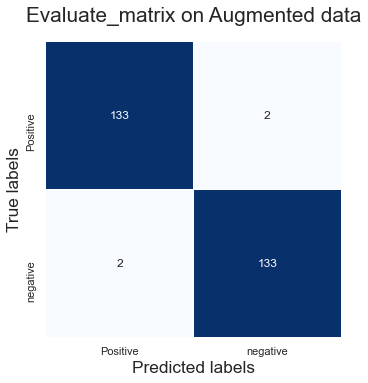

              precision    recall  f1-score   support

    Positive       0.99      0.99      0.99       135
    negative       0.99      0.99      0.99       135

    accuracy                           0.99       270
   macro avg       0.99      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270



In [31]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
def evaluate_matrix(y_test, y_predict, name):
    cm = confusion_matrix(y_test, y_predict)
    cm_df = pd.DataFrame(cm, index=["Positive",'negative'], columns=["Positive",'negative'])

    plt.figure(figsize=(5, 5))

    sns.set(font_scale=1)

    ax = sns.heatmap(cm_df, annot=True, square=True, fmt='d', linewidths=.2, cbar=0, cmap=plt.cm.Blues)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    plt.ylabel("True labels",fontsize = 'x-large')
    plt.xlabel("Predicted labels",fontsize = 'x-large')
    plt.tight_layout()
    plt.title(name,fontsize = 'xx-large',pad = 20)

    plt.show()

    print(classification_report(y_Test, y_Predict, target_names=["Positive",'negative']))
evaluate_matrix(y_Test, y_Predict,'Evaluate_matrix on Augmented data')

#### the below part is my rough work, I tested various sounds,that is only for checking various cough sounds, not needed for model bvuilding, ignore if not useful

In [32]:
'''#y_pred = model.predict_classes(X_test)
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred,axis=1)
cm = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(cm):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Negative','Positive']
    plt.title('COVID-19 Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.savefig("./img/Fig6_Confusion_Matrix_50_epochs.png")
    plt.show()
plot_confusion_matrix(cm)'''  

'#y_pred = model.predict_classes(X_test)\ny_pred=model.predict(X_test) \ny_pred=np.argmax(y_pred,axis=1)\ncm = confusion_matrix(y_test, y_pred)\ndef plot_confusion_matrix(cm):\n    plt.figure()\n    plt.imshow(cm, interpolation=\'nearest\', cmap=plt.cm.Blues)\n    classNames = [\'Negative\',\'Positive\']\n    plt.title(\'COVID-19 Confusion Matrix\')\n    plt.ylabel(\'True label\')\n    plt.xlabel(\'Predicted label\')\n    tick_marks = np.arange(len(classNames))\n    plt.xticks(tick_marks, classNames, rotation=45)\n    plt.yticks(tick_marks, classNames)\n    s = [[\'TN\',\'FP\'], [\'FN\', \'TP\']]\n    for i in range(2):\n        for j in range(2):\n            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))\n    plt.savefig("./img/Fig6_Confusion_Matrix_50_epochs.png")\n    plt.show()\nplot_confusion_matrix(cm)'

In [33]:
'''def plot_loss_accuracy(clf):
    loss_clf = clf.history['loss']
    acc_clf = clf.history['accuracy']
    epoch_range = list(range(1, 51))

    plt.figure()
    plt.plot(epoch_range, loss_clf)
    plt.title(f"Loss for {len(epoch_range)} Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.savefig("./img/Fig4_Loss_Per_50_Epochs.png")


    plt.figure()
    plt.plot(epoch_range, acc_clf)
    plt.title(f"Accuracy {len(epoch_range)} Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.savefig("./img/Fig5_Accuracy_per_50_epochs.png")
    plt.show()
    
    y_pred = model.predict_classes(X_test)
    print("\n **Confusion Matrix**\n")
    #print(confusion_matrix(y_test, y_pred))
    plot_confusion_matrix(cm)
    print("\n **Classification Report**\n")
    print(classification_report(y_test, y_pred))

plot_loss_accuracy(clf)'''    

'def plot_loss_accuracy(clf):\n    loss_clf = clf.history[\'loss\']\n    acc_clf = clf.history[\'accuracy\']\n    epoch_range = list(range(1, 51))\n\n    plt.figure()\n    plt.plot(epoch_range, loss_clf)\n    plt.title(f"Loss for {len(epoch_range)} Epochs")\n    plt.xlabel("Epochs")\n    plt.ylabel("Loss")\n    plt.savefig("./img/Fig4_Loss_Per_50_Epochs.png")\n\n\n    plt.figure()\n    plt.plot(epoch_range, acc_clf)\n    plt.title(f"Accuracy {len(epoch_range)} Epochs")\n    plt.xlabel("Epochs")\n    plt.ylabel("Accuracy")\n    plt.savefig("./img/Fig5_Accuracy_per_50_epochs.png")\n    plt.show()\n    \n    y_pred = model.predict_classes(X_test)\n    print("\n **Confusion Matrix**\n")\n    #print(confusion_matrix(y_test, y_pred))\n    plot_confusion_matrix(cm)\n    print("\n **Classification Report**\n")\n    print(classification_report(y_test, y_pred))\n\nplot_loss_accuracy(clf)'

In [34]:
np.argmax(model.predict(X_test),axis=1)

9/9 [==============================] - 0s 2ms/step


array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0], dtype=int64)

In [ ]:
# testing no of values with 0 i.e., not covid

In [35]:
X1= (shuffle_train_df.iloc[:, :-1]).to_numpy()
X1
c=0
for i in X1:
    i=i.reshape(1,-1)
    
    
    
    
    X1=stsc.transform(i)
    k=np.argmax(model.predict(X1),axis=1)
    
    if k==0:
        c=c+1
c

1/1 [==============================] - 0s 16ms/step


189

In [21]:
header = 'chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 41):
    header += f' mfcc{i}'

header = header.split()

In [22]:
file=data['file_properties'][4]
def feature_extract(file_name):
    y,sr = librosa.load(file_name, mono=True, duration=5)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=40)
    to_append = f'{np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    return to_append

In [23]:
gita=feature_extract(file).split()
gita


['0.41269657015800476',
 '0.05900385230779648',
 '1555.64863350034',
 '1418.5999316294915',
 '2870.7370923913045',
 '0.13399832589285715',
 '-340.5880126953125',
 '104.15670013427734',
 '-32.22844314575195',
 '-13.615362167358398',
 '-3.0296642780303955',
 '0.512090265750885',
 '-21.811838150024414',
 '-17.781814575195312',
 '-9.270073890686035',
 '-5.505613803863525',
 '-5.385944366455078',
 '-8.24716854095459',
 '0.9400057792663574',
 '-5.701087474822998',
 '-6.326630115509033',
 '-1.0800398588180542',
 '-1.8126091957092285',
 '-2.5189857482910156',
 '-3.6842663288116455',
 '-3.564146041870117',
 '-3.4010818004608154',
 '-0.5142861008644104',
 '-1.7463746070861816',
 '-1.9619994163513184',
 '-1.5433094501495361',
 '-0.9622567892074585',
 '-2.608119487762451',
 '-2.4753191471099854',
 '0.0837450698018074',
 '-1.5333882570266724',
 '-1.1996523141860962',
 '-0.1515294909477234',
 '-1.3328003883361816',
 '-0.10606633126735687',
 '0.5825127363204956',
 '-0.8612028360366821',
 '0.320628046

In [446]:
df=pd.DataFrame([gita],columns=header)
df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc31,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40
0,0.41269657015800476,0.05900385230779648,1555.64863350034,1418.5999316294915,2870.7370923913045,0.13399832589285715,-340.5880126953125,104.15670013427734,-32.22844314575195,-13.615362167358398,...,-1.1996523141860962,-0.1515294909477234,-1.3328003883361816,-0.10606633126735687,0.5825127363204956,-0.8612028360366821,0.3206280469894409,1.5741541385650635,0.41345855593681335,0.4446161389350891


In [447]:
X1 = df.to_numpy()
X1.reshape(1,-1)

array([['0.41269657015800476', '0.05900385230779648', '1555.64863350034',
        '1418.5999316294915', '2870.7370923913045',
        '0.13399832589285715', '-340.5880126953125',
        '104.15670013427734', '-32.22844314575195',
        '-13.615362167358398', '-3.0296642780303955',
        '0.512090265750885', '-21.811838150024414',
        '-17.781814575195312', '-9.270073890686035',
        '-5.505613803863525', '-5.385944366455078', '-8.24716854095459',
        '0.9400057792663574', '-5.701087474822998', '-6.326630115509033',
        '-1.0800398588180542', '-1.8126091957092285',
        '-2.5189857482910156', '-3.6842663288116455',
        '-3.564146041870117', '-3.4010818004608154',
        '-0.5142861008644104', '-1.7463746070861816',
        '-1.9619994163513184', '-1.5433094501495361',
        '-0.9622567892074585', '-2.608119487762451',
        '-2.4753191471099854', '0.0837450698018074',
        '-1.5333882570266724', '-1.1996523141860962',
        '-0.1515294909477234', '-1

In [448]:
X1=stsc.transform(X1)
print(np.argmax(model.predict(X1),axis=1))

[1]


In [429]:
#categorical,Confuse+report,imbalance(smote),checking with outside data are pending

In [449]:
path=r'C:\Users\HP\Downloads\corona samples'
i=3
file=path+'\sample-'+f'{i}'+'.wav'
file

'C:\\Users\\HP\\Downloads\\corona samples\\sample-3.wav'

In [450]:
for i in range(1,42):
    file=path+'\sample-'+f'{i}'+'.wav'
    gita=feature_extract(file).split()
    df=pd.DataFrame([gita],columns=header)
    X1 =(df.to_numpy()).reshape(1,-1)
    X1=stsc.transform(X1)
    print(np.argmax(model.predict(X1),axis=1))


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [451]:
Path=r'C:\Users\HP\Downloads\normal sounds'
for i in range(1,111):
    file=Path+'\sample-'+f'{i}'+'.wav'
    gita=feature_extract(file).split()
    df=pd.DataFrame([gita],columns=header)
    X1 = (df.to_numpy()).reshape(1,-1)
    X1=stsc.transform(X1)
    print(np.argmax(model.predict(X1),axis=1))


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [452]:
import os
file_list=os.listdir(r'C:\Users\HP\Downloads\COVID')
file_list
for i in file_list[1:]:
    file=os.path.join(r'C:\Users\HP\Downloads\COVID',i)
    gita=feature_extract(file).split()
    df=pd.DataFrame([gita],columns=header)
    X1 = df.to_numpy()
    X1=stsc.transform(X1)
    print(np.argmax(model.predict(X1),axis=1))
    

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[0]


In [461]:
list=os.listdir(r'C:/Users/HP/Downloads/trial_covid')
for i in list:
    file=os.path.join('C:/Users/HP/Downloads/trial_covid',i)
    print(file)

C:/Users/HP/Downloads/trial_covid\--U7joUcTCo_ 0.000_ 10.000.wav
C:/Users/HP/Downloads/trial_covid\-5dCv5_nvU8_ 200.000_ 210.000.wav
C:/Users/HP/Downloads/trial_covid\-bZrDCS8KAg_ 70.000_ 80.000.wav
C:/Users/HP/Downloads/trial_covid\-ej81N6Aqo4_ 0.000_ 8.000.wav
C:/Users/HP/Downloads/trial_covid\-gvLnl1smfs_ 90.000_ 100.000.wav
C:/Users/HP/Downloads/trial_covid\-hu5q-Nn4BM_ 70.000_ 80.000.wav
C:/Users/HP/Downloads/trial_covid\-jLQkyDhIxw_ 10.000_ 20.000.wav
C:/Users/HP/Downloads/trial_covid\-jZav58HEOw_ 50.000_ 60.000.wav
C:/Users/HP/Downloads/trial_covid\-Mdd8ysxJ5c_ 10.000_ 20.000.wav
C:/Users/HP/Downloads/trial_covid\-o2vmOibWF4_ 310.000_ 320.000.wav
C:/Users/HP/Downloads/trial_covid\-OanE09iAA4_ 0.000_ 10.000.wav
C:/Users/HP/Downloads/trial_covid\-szeMToBrRE_ 60.000_ 70.000.wav
C:/Users/HP/Downloads/trial_covid\-TbcaCBA0pI_ 50.000_ 60.000.wav
C:/Users/HP/Downloads/trial_covid\-THYRau6Prs_ 220.000_ 230.000.wav
C:/Users/HP/Downloads/trial_covid\-VbTE2bPuyw_ 210.000_ 220.000.wav
C:/Us

In [457]:
import pandas as pd
mf=pd.read_csv(r'Downloads\cough_trial_extended (1).csv')
mfc=mf[mf['class']=='covid']
mfn=mf[mf['class']=='not_covid']
mfn

,file_properties,class
0,0v8MGxNetjg_ 10.000_ 20.000.wav,not_covid
1,1j1duoxdxBg_ 70.000_ 80.000.wav,not_covid
2,1MSYO4wgiag_ 120.000_ 130.000.wav,not_covid
3,1PajbAKd8Kg_ 0.000_ 10.000.wav,not_covid
23,-jZav58HEOw_ 50.000_ 60.000.wav,not_covid
...,...,...
165,-bZrDCS8KAg_ 70.000_ 80.000.wav,not_covid
166,-ej81N6Aqo4_ 0.000_ 8.000.wav,not_covid
167,-gvLnl1smfs_ 90.000_ 100.000.wav,not_covid
168,-hu5q-Nn4BM_ 70.000_ 80.000.wav,not_covid


In [466]:
route=r'C:/Users/HP/Downloads/trial_covid/'
for i in mfn['file_properties']:
    file=route+i
    gita=feature_extract(file).split()
    df=pd.DataFrame([gita],columns=header)
    X1 = df.to_numpy()
    X1=stsc.transform(X1)
    print(np.argmax(model.predict(X1),axis=1))
    

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [467]:
route=r'C:/Users/HP/Downloads/trial_covid/'
for i in mfc['file_properties']:
    file=route+i
    gita=feature_extract(file).split()
    df=pd.DataFrame([gita],columns=header)
    X1 = df.to_numpy()
    X1=stsc.transform(X1)
    print(np.argmax(model.predict(X1),axis=1))
    

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


In [79]:

file=open('web app.hdf5','wb')
.dump(model,file)

INFO:tensorflow:Assets written to: ram://ed8e8aed-6ef6-42ec-88ac-b66993f70591/assets


NotFoundError: 

In [462]:
list=os.listdir(r'C:/Users/HP/Downloads/trial_covid')
for i in list:
    file=os.path.join('C:/Users/HP/Downloads/trial_covid',i)
    gita=feature_extract(file).split()
    df=pd.DataFrame([gita],columns=header)
    X1 = df.to_numpy()
    X1=stsc.transform(X1)
    print(np.argmax(model.predict(X1),axis=1))
    

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]


In [469]:
path=r'C:\Users\HP\Downloads\COVID_Cough-master\data\negative'
list1=os.listdir(path)
for i in list1:
    file=os.path.join(path,i)
    gita=feature_extract(file).split()
    df=pd.DataFrame([gita],columns=header)
    X1 = df.to_numpy()
    X1=stsc.transform(X1)
    print(np.argmax(model.predict(X1),axis=1))

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [470]:
path=r'C:\Users\HP\Downloads\COVID_Cough-master\data\positive'
list2=os.listdir(path)
for i in list2:
    file=os.path.join(path,i)
    gita=feature_extract(file).split()
    df=pd.DataFrame([gita],columns=header)
    X1 = (df.to_numpy()).reshape(1,-1)
    X1=stsc.transform(X1)
    print(np.argmax(model.predict(X1),axis=1))

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


KeyboardInterrupt: 

In [399]:
max(l1)#0.9999263
min(l1)#0.063761234
max(l1)#0.7014932
#min(l1)#3.820657e-06

0.7014932

In [401]:
for i in l:
    if i>0.01243481 and i<0.7014932:
        print(i)#(0.65,0.012)

0.2629105
0.037541598
0.06882894
0.11359984
0.18278155
0.01243481
0.6572033
0.20930782
0.14080727
0.29561606


In [402]:
for i in l1:
    if i>0.01243481 and i<0.7014932:
        print(i)#(0.04,0.014)

0.01424998
0.016555995
0.022710323
0.020377576
0.016237348
0.03887877
0.02266112


In [395]:
max(l)#0.9648404
min(l)#6.727416e-07
max(l)#0.9999902
#min(l)#0.01243481

0.9999902

In [471]:
path=r'D:\webm to wav\corona'
list3=os.listdir(path)
for i in list3:
    file=os.path.join(path,i)
    gita=feature_extract(file).split()
    df=pd.DataFrame([gita],columns=header)
    X1 = (df.to_numpy()).reshape(1,-1)
    X1=stsc.transform(X1)
    print(np.argmax(model.predict(X1),axis=1))

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [472]:
path=r'D:\webm to wav\normal'
list4=os.listdir(path)
for i in list4:
    file=os.path.join(path,i)
    gita=feature_extract(file).split()
    df=pd.DataFrame([gita],columns=header)
    X1 = (df.to_numpy()).reshape(1,-1)
    X1=stsc.transform(X1)
    print(np.argmax(model.predict(X1),axis=1))

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [473]:
path=r'C:\Users\HP\Downloads\NORMAL S'
list5=os.listdir(path)
for i in list5:
    file=os.path.join(path,i)
    gita=feature_extract(file).split()
    df=pd.DataFrame([gita],columns=header)
    X1 = (df.to_numpy()).reshape(1,-1)
    X1=stsc.transform(X1)
    print(np.argmax(model.predict(X1),axis=1))


[1]
[0]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]


In [3]:
import pandas as pd
of=pd.read_csv(r'C:\Users\HP\Downloads\XAI Covid-19 Cough\covid.csv')
of1=of[of['classification']=='covid']
of2=of[of['classification']=='not_covid']

In [5]:
path=r'C:\Users\HP\Downloads\XAI Covid-19 Cough\audios_covid'
import os
for i in of2['file_name']:
    file=os.path.join(path,i)
    file=file+'.wav'
    #print(file)
    
    gita=feature_extract(file).split()
    df=pd.DataFrame([gita],columns=header)
    X1 = (df.to_numpy()).reshape(1,-1)
    X1=stsc.transform(X1)
    print(np.argmax(model.predict(X1),axis=1))



NameError: name 'feature_extract' is not defined